<!-- # CNN autoencoder and Clustering from MTRX data

Use this notebook to load Scienta Omicron Matrix format SPM data and create standardised images for machine learning training and analysis. The code can generate both JPG image data, useful for manually checking the data, and windowed numpy data that can be loaded into ML models. 

The notebook then creates an autoencoder for training on a large dataset, followed by KMEANS clustering. 

**Author**: Steven R. Schofield  
**Created**: November, 2024 -->

# CASTEP output analysis
## Steven R. Schofield (Universtiy College London) May 2025

### Load required modules

In [15]:
import sys
from pathlib import Path

# Define candidate paths using Path objects
module_path_list = [
    Path('/Users/steven/academic-iCloud/Python/modules'),
    Path('/hpc/srs/Python/modules')
]

data_path_list = [
    Path('/Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure'),
    Path('/hpc/srs/Python-data')
]

# Resolve actual paths
module_path = next((p for p in module_path_list if p.exists()), None)
data_path = next((p for p in data_path_list if p.exists()), None)

# Check and report missing paths
if module_path is None:
    print("Error: Could not locate a valid module path.")
if data_path is None:
    print("Error: Could not locate a valid data path.")

if module_path is None or data_path is None:
    sys.exit(1)

# Add module_path to sys.path if needed
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

# Print resolved paths
print(f"module_path = {module_path}")
print(f"data_path = {data_path}")


module_path = /Users/steven/academic-iCloud/Python/modules
data_path = /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure


In [16]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import numpy as np
import pandas as pd

# Import custom module
import SRSCALCUTILS.castep_tools as ct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Programme variable setup

In [22]:
# Parameters for windows creation
# General
job_folder = '1x6x8/1x6x8-821MP-SP-negative'
job_folder = '1x6x8'
job_folder = '1x12x8'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8


In [25]:
! pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [reportlab]/2 [reportlab]



                                                     FILE: si1128_Hbb_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_Hbb_n   

Final enthalpy = -16944.5079 eV.


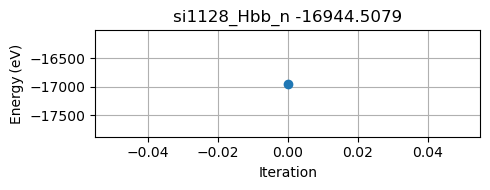

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,421.0
3,net charge of system,0.0
4,net spin of system,1.0
5,number of up spins,211.0
6,number of down spins,210.0
7,number of bands,253.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_Hb_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_Hb_n   

Final enthalpy = -16944.3921 eV.


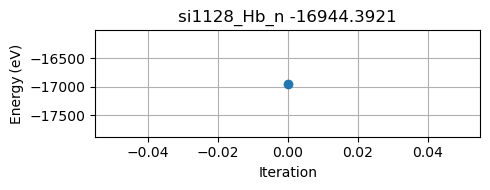

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,421.0
3,net charge of system,0.0
4,net spin of system,1.0
5,number of up spins,211.0
6,number of down spins,210.0
7,number of bands,253.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_di_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_di_n   

Final enthalpy = -17117.7643 eV.


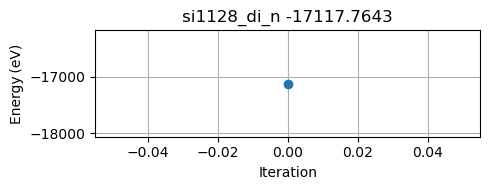

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,432.0
3,net charge of system,0.0
4,net spin of system,0.0
5,number of up spins,216.0
6,number of down spins,216.0
7,number of bands,259.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_3x1_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_3x1_n   

Final enthalpy = -16993.6622 eV.


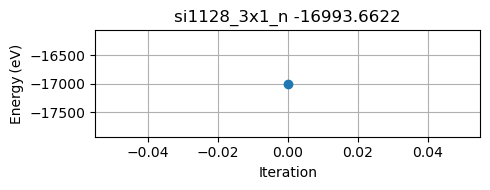

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,424.0
3,net charge of system,0.0
4,net spin of system,0.0
5,number of up spins,212.0
6,number of down spins,212.0
7,number of bands,254.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_di.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_di   

Final enthalpy = -17117.7959 eV.


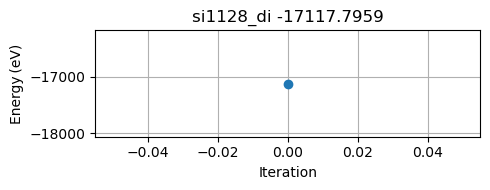

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,432.0
3,net charge of system,0.0
4,net spin of system,0.0
5,number of up spins,216.0
6,number of down spins,216.0
7,number of bands,259.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_DB_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_DB_n   

Final enthalpy = -16912.7504 eV.


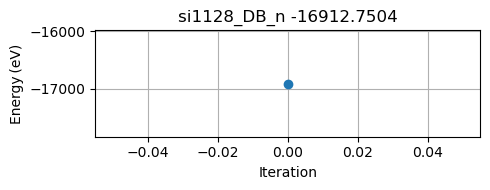

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,419.0
3,net charge of system,0.0
4,net spin of system,1.0
5,number of up spins,210.0
6,number of down spins,209.0
7,number of bands,252.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_clean_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_clean_n   

Final enthalpy = -16726.7065 eV.


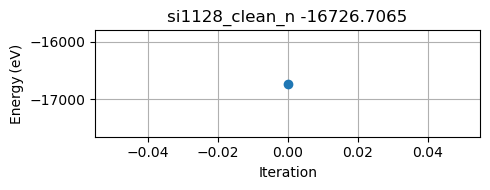

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,408.0
3,net charge of system,0.0
4,net spin of system,0.0
5,number of up spins,204.0
6,number of down spins,204.0
7,number of bands,245.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_1di_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_1di_n   

Final enthalpy = -16961.6278 eV.


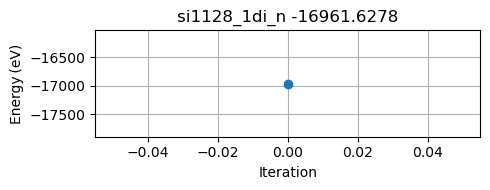

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,422.0
3,net charge of system,0.0
4,net spin of system,0.0
5,number of up spins,211.0
6,number of down spins,211.0
7,number of bands,253.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_Ob_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_Ob_n   

Final enthalpy = -17370.7517 eV.


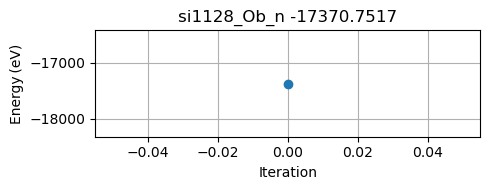

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,426.0
3,net charge of system,0.0
4,net spin of system,0.0
5,number of up spins,213.0
6,number of down spins,213.0
7,number of bands,256.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()


                                                     FILE: si1128_mono_n.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x12x8/1x12x8-821MP-SP-neutral/si1128_mono_n   

Final enthalpy = -16929.7243 eV.


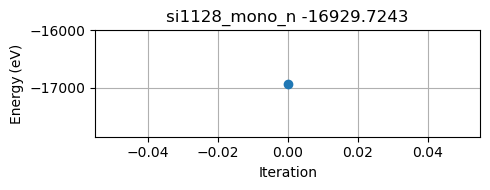

,Cell parameters,Value
0,ax,3.866835
1,ay,46.402016
2,az,25.937060
3,nx,1.000000
4,ny,12.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,750.0000 eV
1,finite basis set correction,none
2,number of electrons,420.0
3,net charge of system,0.0
4,net spin of system,0.0
5,number of up spins,210.0
6,number of down spins,210.0
7,number of bands,252.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

In [28]:
castep_paths = ct.find_all_files_by_extension(job_path, extension=".castep")

for castep_path in castep_paths:
    # Header and error information
    ct.print_file_info(castep_path)
    #ct.extract_warnings(castep_path,verbose=True)

    # Energy convergence
    convergence = ct.extract_LBFGS_energies(castep_path)
    final_enthalpy = ct.extract_LBFGS_final_enthalpy(castep_path)
    print('Final enthalpy = {} eV.'.format(final_enthalpy))
    ct.plot_energy_vs_iteration(convergence, title=castep_path.stem+' '+str(final_enthalpy),figsize=(5,2))
    
    # Unit cell parameters
    cell = ct.extract_lattice_parameters(castep_path,a0=3.8668346, vac=15.0)
    cell_df = pd.DataFrame(cell.items(), columns=["Cell parameters", "Value"])
    display(cell_df) 

    # General parameters
    general_params = ct.extract_summary_parameters(castep_path)
    general_params_df = pd.DataFrame(general_params.items(), columns=["General parameter", "Value"])
    display(general_params_df) 

    # Show structure
    atoms = ct.fractional_coords_from_castep(castep_path)
    ct.view_structure(atoms)
    
    

In [21]:
data_summary = ct.collect_summary_table(job_path)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_summary)

,File,RelPath,nx,ny,nz,kx,ky,kz,Cut-off (eV),Net Charge,Net Spin,Final Enthalpy (eV)
0,si1128_Hbb_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_Hbb_n,1,12,8,8,1,1,750.0000 eV,0.0,1.0,-16944.50790
1,si1128_Hb_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_Hb_n,1,12,8,8,1,1,750.0000 eV,0.0,1.0,-16944.39210
2,si1128_di_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_di_n,1,12,8,8,1,1,750.0000 eV,0.0,0.0,-17117.76430
3,si1128_3x1_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_3x1_n,1,12,8,8,1,1,750.0000 eV,0.0,0.0,-16993.66220
4,si1128_di,1x12x8/1x12x8-821MP-SP-neutral/si1128_di,1,12,8,8,1,1,750.0000 eV,0.0,0.0,-17117.79590
5,si1128_DB_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_DB_n,1,12,8,8,1,1,750.0000 eV,0.0,1.0,-16912.75040
6,si1128_clean_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_clean_n,1,12,8,8,1,1,750.0000 eV,0.0,0.0,-16726.70650
7,si1128_1di_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_1di_n,1,12,8,8,1,1,750.0000 eV,0.0,0.0,-16961.62780
8,si1128_Ob_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_Ob_n,1,12,8,8,1,1,750.0000 eV,0.0,0.0,-17370.75170
9,si1128_mono_n,1x12x8/1x12x8-821MP-SP-neutral/si1128_mono_n,1,12,8,8,1,1,750.0000 eV,0.0,0.0,-16929.72430


In [ ]:
castep_paths[0]

In [ ]:
atoms = ct.extract_final_fractional_positions(castep_paths[0])
view(atoms)

In [ ]:
from ase.io import read
from ase.visualize import view


atoms = read(geom_paths[0])  # or .castep, .traj, etc.
view(atoms)


In [ ]:




castep_paths = ct.find_all_files_by_extension(data_path, extension=".castep")

#atoms = rotate_atoms(atoms, axis='z', angle_deg=45)  # Rotate 45° about z-axis
atoms = view_fractional_structure(castep_paths[0])


In [ ]:
print(view.representations)
view = nv.show_ase(atoms, default=False)
view.add_representation(
    'ball+stick',
    selection='all',
    scale=0.5,
    aspectRatio=1.5
)
view.center()
display(view)


In [ ]:
params = {'task' : 'geomopt',
          'xc_functional' : 'PBE',
          'cut_off_energy' : 750,
          'spin_polarised' : 'true',
          'write_cell_structure' : 'true',
          'charge' : 0}

In [ ]:
print(params['task'])

In [ ]:
def write_param_file(params):
    width = max(len(k) for k in params)
    for param, value in params.items():
        print(f'{param:<{width+1}} : {value}')